In [69]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import math
from sklearn.metrics import mean_squared_error

#### Loading dataset

In [70]:
stock = pd.read_csv("tesla.csv",encoding='ISO-8859-1')
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [71]:
stock.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [72]:
stock.shape

(1692, 7)

In [73]:
stock=stock.reset_index()['Close']

#### Plotting the stock price

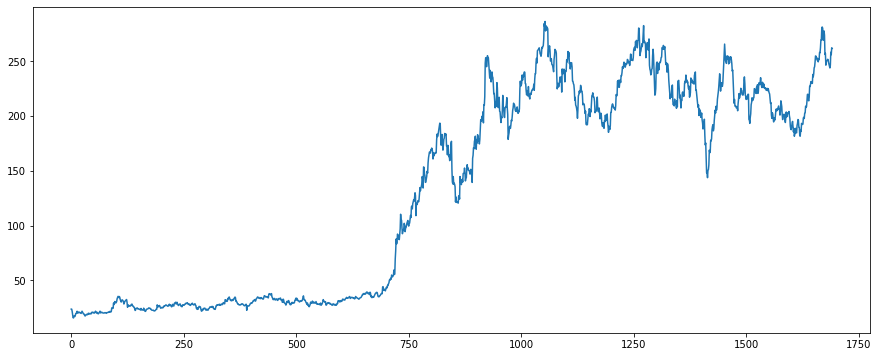

In [74]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(stock)

#### Normalize the data

In [75]:
scaler=MinMaxScaler(feature_range=(0,1))
stock=scaler.fit_transform(np.array(stock).reshape(-1,1))

#### Splitting the stock data into train and test set


In [76]:
training_size=int(len(stock)*0.80)
test_size=len(stock)-training_size
training_data=stock[0:training_size,:]
test_data=stock[training_size:len(stock),:]

In [77]:
print(len(training_data))
print(len(test_data))

1353
339


#### convert an array of values into a dataset matrix

In [79]:
def create_dataset(data, time_step):
    dataX, dataY = [], []
    for i in range(len(data)-time_step-1):
        X = data[i:(i+time_step), :]  
        dataX.append(X)
        y=data[i + time_step, :]
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

#### Every time it will take 50 inputs as train data and based on this input it will produce test data

In [80]:
time_step = 50
X_train, y_train = create_dataset(training_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [81]:
print(X_train.shape, y_train.shape )

print(X_test.shape, y_test.shape )

(1302, 50, 1) (1302, 1)
(288, 50, 1) (288, 1)


In [132]:
# reshape data to sent it to LSTM model

In [133]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [134]:
model=Sequential()
model.add(LSTM(512,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(256,return_sequences=True))
model.add(LSTM(128))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [84]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 1302 samples, validate on 288 samples
Epoch 1/100
1302/1302 [==============================] - 5s 4ms/step - loss: 0.0731 - val_loss: 0.0384
Epoch 2/100
1302/1302 [==============================] - 3s 3ms/step - loss: 0.0063 - val_loss: 0.0041
Epoch 3/100
1302/1302 [==============================] - 3s 2ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 4/100
1302/1302 [==============================] - 3s 2ms/step - loss: 0.0018 - val_loss: 0.0039
Epoch 5/100
1302/1302 [==============================] - 3s 2ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 6/100
1302/1302 [==============================] - 3s 2ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 7/100
1302/1302 [==============================] - 3s 2ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 8/100
1302/1302 [==============================] - 3s 2ms/step - loss: 0.0016 - val_loss: 0.0036
Epoch 9/100
1302/1302 [==============================] - 4s 3ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 10/100
1302/1302 [==

1302/1302 [==============================] - 3s 3ms/step - loss: 5.7903e-04 - val_loss: 9.0227e-04
Epoch 78/100
1302/1302 [==============================] - 3s 2ms/step - loss: 5.8693e-04 - val_loss: 8.5240e-04
Epoch 79/100
1302/1302 [==============================] - 3s 3ms/step - loss: 5.6538e-04 - val_loss: 0.0011
Epoch 80/100
1302/1302 [==============================] - 3s 3ms/step - loss: 5.8150e-04 - val_loss: 7.5234e-04
Epoch 81/100
1302/1302 [==============================] - 3s 2ms/step - loss: 5.3593e-04 - val_loss: 8.0721e-04
Epoch 82/100
1302/1302 [==============================] - 3s 2ms/step - loss: 4.9632e-04 - val_loss: 7.2425e-04
Epoch 83/100
1302/1302 [==============================] - 3s 3ms/step - loss: 4.9819e-04 - val_loss: 7.7118e-04
Epoch 84/100
1302/1302 [==============================] - 3s 2ms/step - loss: 4.8899e-04 - val_loss: 6.9968e-04
Epoch 85/100
1302/1302 [==============================] - 3s 2ms/step - loss: 4.9451e-04 - val_loss: 7.7826e-04
Epoch 86/

#### Predict train and test data

In [85]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

#### Transformback the data into original form

In [86]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
stock=scaler.inverse_transform(stock)

In [89]:
X_train.shape

(1302, 50, 1)

In [94]:
train_predict.shape

(1302, 1)

In [92]:
test_predict.shape

(288, 1)

#### Shift train and test predictions for plotting

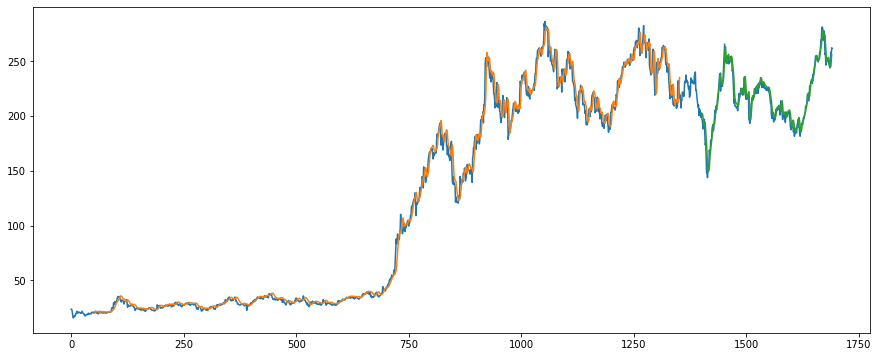

In [129]:
shift=50
trainPredictPlot = np.empty_like(stock)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[shift+1:len(train_predict)+shift+1, :] = train_predict

testPredictPlot = np.empty_like(stock)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(shift*2)+1:len(stock)-1, :] = test_predict

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot((stock))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()